In [19]:
import pandas as pd
from scipy.io import arff

data = arff.loadarff('breast.w.arff')
df = pd.DataFrame(data[0])
df.dropna(inplace=True)
df.replace(b'benign', 0, inplace=True)
df.replace(b'malignant', 1, inplace=True)

data = df.drop(["Class"],axis=1).values
target = df["Class"].values

In [20]:
from sklearn import cluster
from sklearn.metrics import silhouette_score
import numpy as np

def ECR(labels, target, k):
    c_counts = []
    for i in range(k):
        ci_filter = []
        for j in range(len(labels)):
            ci_filter.append(labels[j]==i)
        c_counts.append(min(np.bincount(target[ci_filter])))
    error = 0
    for el in c_counts:
        error += el
    return error/k

for k in (2,3):
    cl = cluster.KMeans(n_clusters=k)
    predictions = cl.fit_predict(data)
    print(k, "Clusters")
    print("   ECR         ", ECR(predictions,target,k))
    print("   Silhouette  ", silhouette_score(data,predictions))

2 Clusters
   ECR          13.5
   Silhouette   0.5967981179111456
3 Clusters
   ECR          6.666666666666667
   Silhouette   0.5245427800706391


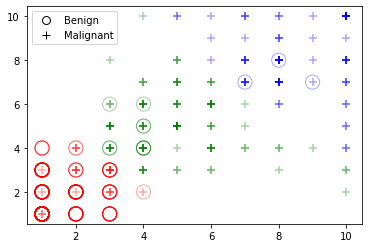

In [21]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

data_selected = SelectKBest(mutual_info_classif, k=2).fit_transform(data, target)
cl = cluster.KMeans(n_clusters=3)
pred = cl.fit_predict(data_selected)
clusters = [[[],[]],[[],[]]], [[[],[]],[[],[]]], [[[],[]],[[],[]]]
for i in range(len(data_selected)):
    clusters[pred[i]][target[i]][0].append(data_selected[i].item(0))
    clusters[pred[i]][target[i]][1].append(data_selected[i].item(1))

plt.scatter(clusters[0][0][0],clusters[0][0][1],marker="o",s=200,alpha=0.35,color="none",edgecolors="red")
plt.scatter(clusters[0][1][0],clusters[0][1][1],marker="+",s=60 ,alpha=0.35,color="red")
plt.scatter(clusters[1][0][0],clusters[1][0][1],marker="o",s=200,alpha=0.35,color="none",edgecolors="blue")
plt.scatter(clusters[1][1][0],clusters[1][1][1],marker="+",s=60 ,alpha=0.35,color="blue")
plt.scatter(clusters[2][0][0],clusters[2][0][1],marker="o",s=200,alpha=0.35,color="none",edgecolors="green")
plt.scatter(clusters[2][1][0],clusters[2][1][1],marker="+",s=60 ,alpha=0.35,color="green")
leg1 = mlines.Line2D([], [], marker='o',color="none",markeredgecolor="black",
                          markersize=8, label='Benign')
leg2 = mlines.Line2D([], [], marker='+',color="none",markeredgecolor="black",
                          markersize=8, label='Malignant')
plt.legend(handles=[leg1,leg2])
